In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(HTML cross)(2).csv")
data

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,0.986964,0.013036,0.817895,0.182105,0.715954,0.284046
1,1,0.030830,0.969170,0.412435,0.587565,0.496744,0.503256
2,0,0.948674,0.051326,0.516142,0.483858,0.524952,0.475048
3,0,0.988278,0.011722,0.892637,0.107363,0.832495,0.167505
4,0,0.944779,0.055221,0.966460,0.033540,0.950510,0.049490
...,...,...,...,...,...,...,...
2933,0,0.922347,0.077653,0.902910,0.097090,0.817390,0.182610
2934,0,0.999651,0.000349,0.939851,0.060149,0.806987,0.193013
2935,1,0.239651,0.760349,0.752760,0.247240,0.683421,0.316579
2936,0,0.980858,0.019142,0.629503,0.370497,0.575333,0.424667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   rfc_prediction_non    2938 non-null   float64
 2   rfc_prediction_phish  2938 non-null   float64
 3   svc_prediction_non    2938 non-null   float64
 4   svc_prediction_phish  2938 non-null   float64
 5   lr_prediction_non     2938 non-null   float64
 6   lr_prediction_phish   2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [5]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [6]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6660 - accuracy: 0.5545 - val_loss: 0.6031 - val_accuracy: 0.8265
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.8544 - val_loss: 0.5159 - val_accuracy: 0.8231
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8022 - val_loss: 0.4523 - val_accuracy: 0.8061
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7837 - val_loss: 0.4032 - val_accuracy: 0.7993
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.7935 - val_loss: 0.3646 - val_accuracy: 0.8265
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8449 - val_loss: 0.3340 - val_accuracy: 0.8912
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8589 - val_loss: 0.3099 - val_accuracy: 0.8946
Epoch 8/100
8

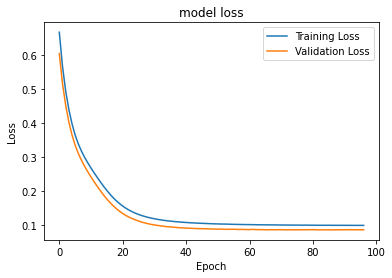

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       228
           1       0.92      0.92      0.92        66

    accuracy                           0.97       294
   macro avg       0.95      0.95      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
True Positive 61
True Negative 223
False Positive 5
False Negative 5
Precision: 0.9242
Recall: 0.9242
F1 Score: 0.9242
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.7863 - val_loss: 0.4681 - val_accuracy: 0.8537
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8831 - val_loss: 0.3635 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.9384 - val_loss: 0.2834 - val_accuracy: 0.9558
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2671 

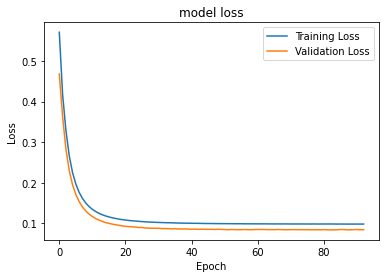

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       222
           1       0.98      0.89      0.93        72

    accuracy                           0.97       294
   macro avg       0.97      0.94      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
True Positive 64
True Negative 221
False Positive 1
False Negative 8
Precision: 0.9846
Recall: 0.8889
F1 Score: 0.9343
Epoch 1/100
83/83 [==============================] - 1s 5ms/step - loss: 0.5252 - accuracy: 0.7655 - val_loss: 0.4031 - val_accuracy: 0.7721
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.7655 - val_loss: 0.3225 - val_accuracy: 0.7721
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8056 - val_loss: 0.2624 - val_accuracy: 0.9082
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2509 

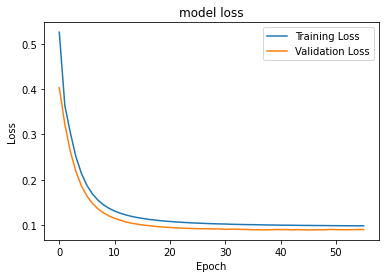

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       227
           1       0.93      0.96      0.94        67

    accuracy                           0.97       294
   macro avg       0.96      0.97      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9727891156462585
True Positive 64
True Negative 222
False Positive 5
False Negative 3
Precision: 0.9275
Recall: 0.9552
F1 Score: 0.9412
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.7655 - val_loss: 0.3473 - val_accuracy: 0.7721
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8011 - val_loss: 0.3047 - val_accuracy: 0.8878
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8884 - val_loss: 0.2840 - val_accuracy: 0.9014
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2634 

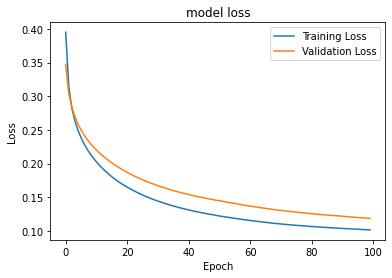

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       227
           1       0.88      0.88      0.88        67

    accuracy                           0.95       294
   macro avg       0.92      0.92      0.92       294
weighted avg       0.95      0.95      0.95       294

Accuracy: 0.9455782312925171
True Positive 59
True Negative 219
False Positive 8
False Negative 8
Precision: 0.8806
Recall: 0.8806
F1 Score: 0.8806
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.7059 - accuracy: 0.5624 - val_loss: 0.6055 - val_accuracy: 0.9558
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.9508 - val_loss: 0.5552 - val_accuracy: 0.9490
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.9505 - val_loss: 0.5181 - val_accuracy: 0.9490
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4942 

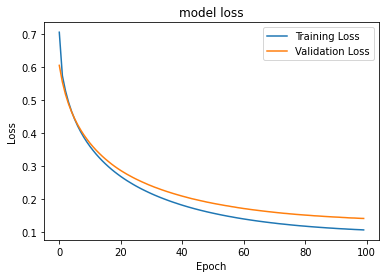

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       229
           1       0.88      0.89      0.89        65

    accuracy                           0.95       294
   macro avg       0.92      0.93      0.93       294
weighted avg       0.95      0.95      0.95       294

Accuracy: 0.9489795918367347
True Positive 58
True Negative 221
False Positive 8
False Negative 7
Precision: 0.8788
Recall: 0.8923
F1 Score: 0.8855
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.9240 - val_loss: 0.5277 - val_accuracy: 0.9660
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.9467 - val_loss: 0.4781 - val_accuracy: 0.9660
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.9523 - val_loss: 0.4442 - val_accuracy: 0.9694
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4426 

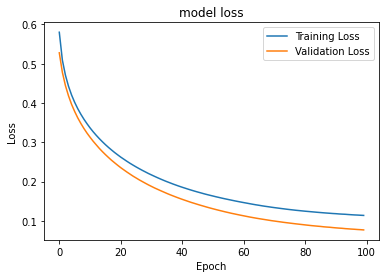

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       227
           1       0.96      0.96      0.96        67

    accuracy                           0.98       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
True Positive 64
True Negative 224
False Positive 3
False Negative 3
Precision: 0.9552
Recall: 0.9552
F1 Score: 0.9552
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5664 - accuracy: 0.8846 - val_loss: 0.4640 - val_accuracy: 0.9354
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.9573 - val_loss: 0.3065 - val_accuracy: 0.9354
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9580 - val_loss: 0.2284 - val_accuracy: 0.9456
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1974 

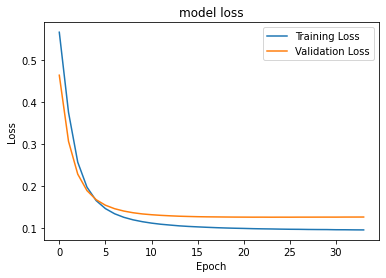

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       229
           1       0.90      0.85      0.87        65

    accuracy                           0.95       294
   macro avg       0.93      0.91      0.92       294
weighted avg       0.94      0.95      0.94       294

Accuracy: 0.9455782312925171
True Positive 55
True Negative 223
False Positive 6
False Negative 10
Precision: 0.9016
Recall: 0.8462
F1 Score: 0.8730
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7693 - val_loss: 0.3823 - val_accuracy: 0.7381
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8207 - val_loss: 0.2935 - val_accuracy: 0.9082
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9312 - val_loss: 0.2382 - val_accuracy: 0.9490
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2109

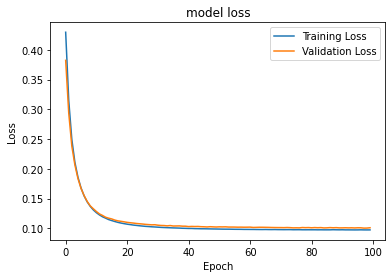

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       217
           1       0.97      0.90      0.93        77

    accuracy                           0.97       294
   macro avg       0.97      0.94      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
True Positive 69
True Negative 215
False Positive 2
False Negative 8
Precision: 0.9718
Recall: 0.8961
F1 Score: 0.9324
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6350 - accuracy: 0.7357 - val_loss: 0.5634 - val_accuracy: 0.9522
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.9433 - val_loss: 0.4645 - val_accuracy: 0.9590
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.9512 - val_loss: 0.3604 - val_accuracy: 0.9659
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3298 

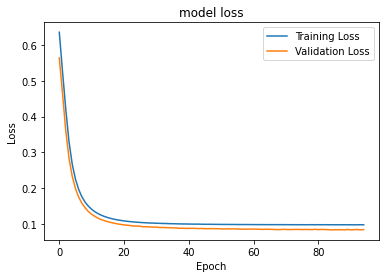

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       226
           1       1.00      0.91      0.95        67

    accuracy                           0.98       293
   macro avg       0.99      0.96      0.97       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9795221843003413
True Positive 61
True Negative 226
False Positive 0
False Negative 6
Precision: 1.0000
Recall: 0.9104
F1 Score: 0.9531
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5614 - accuracy: 0.9569 - val_loss: 0.4673 - val_accuracy: 0.9420
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.9607 - val_loss: 0.3472 - val_accuracy: 0.9590
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.9614 - val_loss: 0.2751 - val_accuracy: 0.9625
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2365 

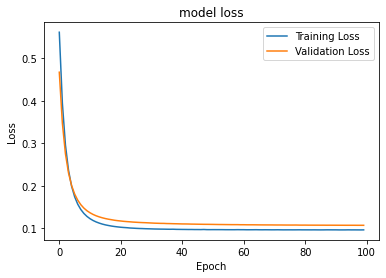

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       219
           1       0.96      0.89      0.92        74

    accuracy                           0.96       293
   macro avg       0.96      0.94      0.95       293
weighted avg       0.96      0.96      0.96       293

Accuracy: 0.962457337883959
True Positive 66
True Negative 216
False Positive 3
False Negative 8
Precision: 0.9565
Recall: 0.8919
F1 Score: 0.9231
Average Validation Accuracy: 0.963585707320471


In [7]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

